In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Load the dataset
data_path = "./dataset/processed/train.csv"
df = pd.read_csv(data_path, dtype={"id": str})

# Preprocess the dataset
df['comment_text'] = df['comment_text'].astype(str)
df['score'] = df['score'].astype(int)

(array([0.71715087, 0.01109306, 0.12706569, 0.03249315, 0.03182319,
        0.02342576, 0.01927362, 0.01393785, 0.0133916 , 0.01034521]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

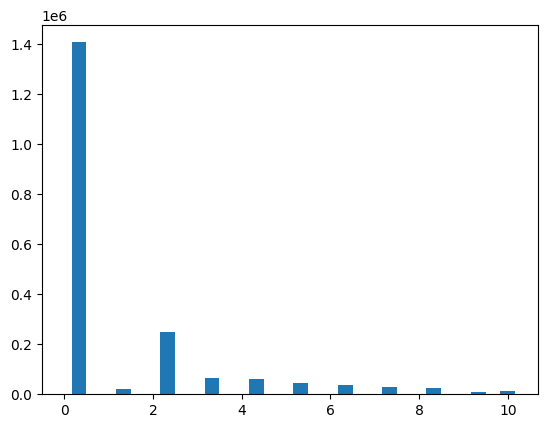

In [8]:
score = df["score"]
plt.hist(score, bins = 30, align = 'right')
weights = np.ones_like(score)/len(score)
plt.hist(score, weights=weights)

In [16]:
not_toxic = df.loc[df["score"] == 0]
level_2_toxic = df.loc[df["score"] == 2]
level_1_toxic = df.loc[df["score"] == 1]
higher_than_2_toxic = df.loc[df["score"] > 2]

In [21]:
df = pd.concat([not_toxic.sample(100_000, random_state=53), level_2_toxic.sample(80_000, random_state=53), level_1_toxic, higher_than_2_toxic])

In [22]:
# shuffle data
df.sample(frac=1)

,Unnamed: 0,id,comment_text,score
1556047,1556050,6026014,"contrast looking in my mirror, with those i h...",4
1537938,1537941,6004456,this identity was obviously created purely for...,3
188183,188183,471377,your arrogance is only exceeded by your ignora...,7
1512679,1512682,5972554,great sarcasm!!,0
645474,645475,1032551,canadians will vote out muslim vote bank politics,5
...,...,...,...,...
908170,908171,5230999,we tried that but pacific resource partnership...,2
1794709,1794712,6320966,wonder if these whizz-kids have heard of the l...,0
561741,561742,930068,intellectual cowards like you always resort to...,5
706578,706579,4987254,"""and the funny part is that you not only think...",4


(array([0.20575962, 0.04483502, 0.1646077 , 0.13132814, 0.12862034,
        0.09468029, 0.07789854, 0.05633287, 0.05412507, 0.04181241]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

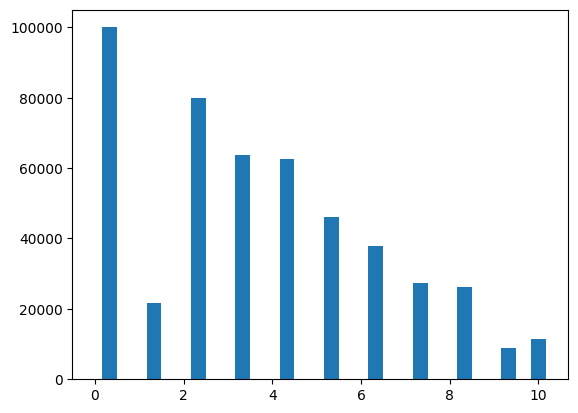

In [23]:
score = df["score"]
plt.hist(score, bins = 30, align = 'right')
weights = np.ones_like(score)/len(score)
plt.hist(score, weights=weights)

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

In [28]:
train_df.shape

(388803, 4)